In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Airbnb dataset
df_airbnb = pd.read_csv('Airbnb_Dataset.csv')

In [4]:
# Display the first few rows of the dataset
print(df_airbnb.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10

In [5]:
# Handle missing values
df_airbnb['reviews_per_month'].fillna(0, inplace=True)

In [6]:
df_airbnb['last_review'].fillna('No Review', inplace=True)

In [7]:
# Check for duplicates and remove if any
df_airbnb.drop_duplicates(inplace=True)

In [8]:
# Display dataset info and missing values
print(df_airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     249 

In [9]:
print(df_airbnb.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# 1. **Room Types Distribution (Bar Chart - matplotlib)**:
   - **Column**: `room_type`
   - **Representation**: Bar chart (matplotlib)
   - **Purpose**: To show the distribution of different room types available on Airbnb.

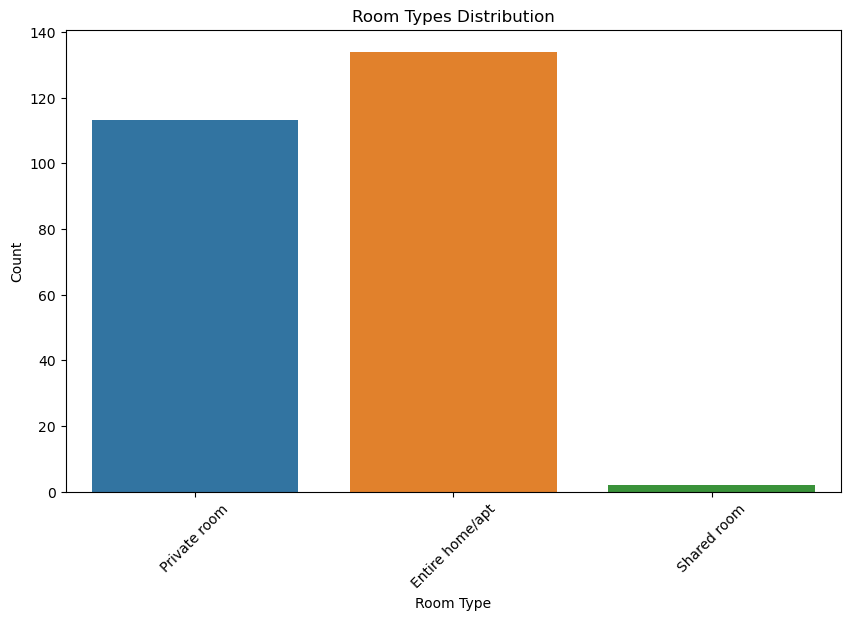

In [10]:
# 1. Room Types Distribution (Bar Chart - matplotlib)
# Column: `room_type`
# Representation: Bar chart (matplotlib)
# Purpose: To show the distribution of different room types available on Airbnb.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_airbnb, x='room_type')
plt.title('Room Types Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 2. **Price Distribution (Histogram - seaborn)**:
   - **Column**: `price`
   - **Representation**: Histogram (seaborn)
   - **Purpose**: To visualize the distribution of listing prices.

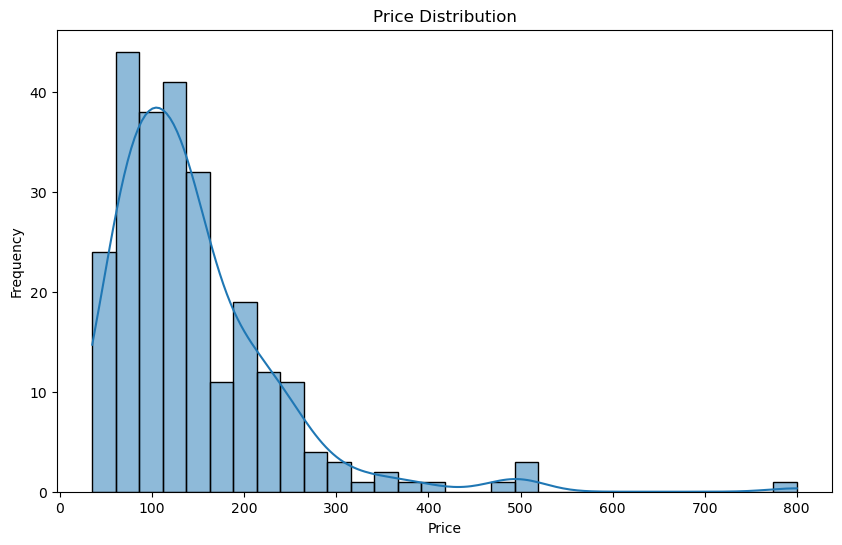

In [11]:
# 2. Price Distribution (Histogram - seaborn)
# Column: `price`
# Representation: Histogram (seaborn)
# Purpose: To visualize the distribution of listing prices.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_airbnb, x='price', bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# 3. **Average Price by Neighbourhood (Bar Plot - seaborn)**:
   - **Column**: `price`, `neighbourhood`
   - **Representation**: Bar plot (seaborn)
   - **Purpose**: To display the average price of listings in different neighbourhoods.

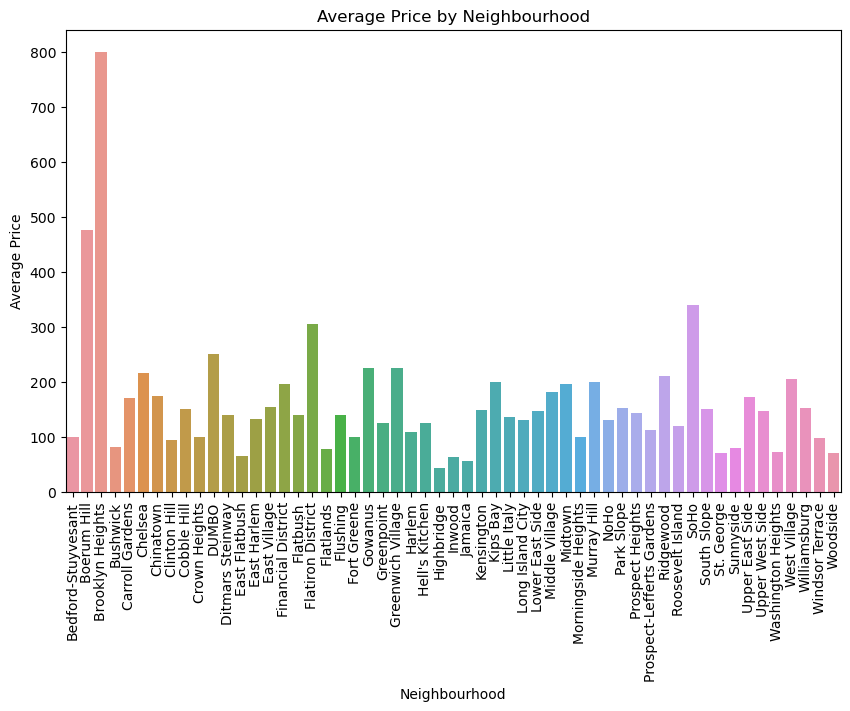

In [12]:
# 3. Average Price by Neighbourhood (Bar Plot - seaborn)
# Column: `price`, `neighbourhood`
# Representation: Bar plot (seaborn)
# Purpose: To display the average price of listings in different neighbourhoods.
plt.figure(figsize=(10, 6))
avg_price_neighbourhood = df_airbnb.groupby('neighbourhood')['price'].mean().reset_index()
sns.barplot(data=avg_price_neighbourhood, x='neighbourhood', y='price')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


# 4. **Availability Distribution (Histogram - seaborn)**:
   - **Column**: `availability_365`
   - **Representation**: Histogram (seaborn)
   - **Purpose**: To show the distribution of availability days across listings.

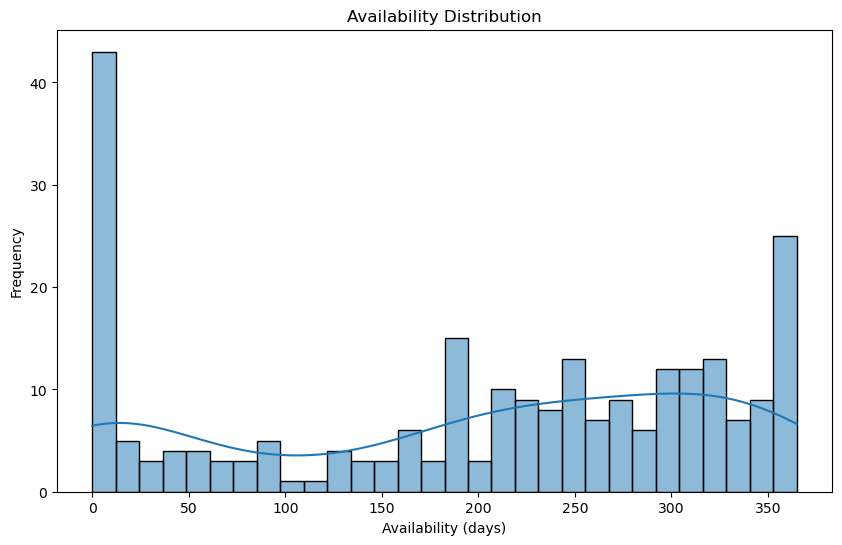

In [13]:
# 4. Availability Distribution (Histogram - seaborn)
# Column: `availability_365`
# Representation: Histogram (seaborn)
# Purpose: To show the distribution of availability days across listings.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_airbnb, x='availability_365', bins=30, kde=True)
plt.title('Availability Distribution')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()


# 5. **Reviews per Month (Histogram - seaborn)**:
   - **Column**: `reviews_per_month`
   - **Representation**: Histogram (seaborn)
   - **Purpose**: To visualize how frequently listings are reviewed on a monthly basis.

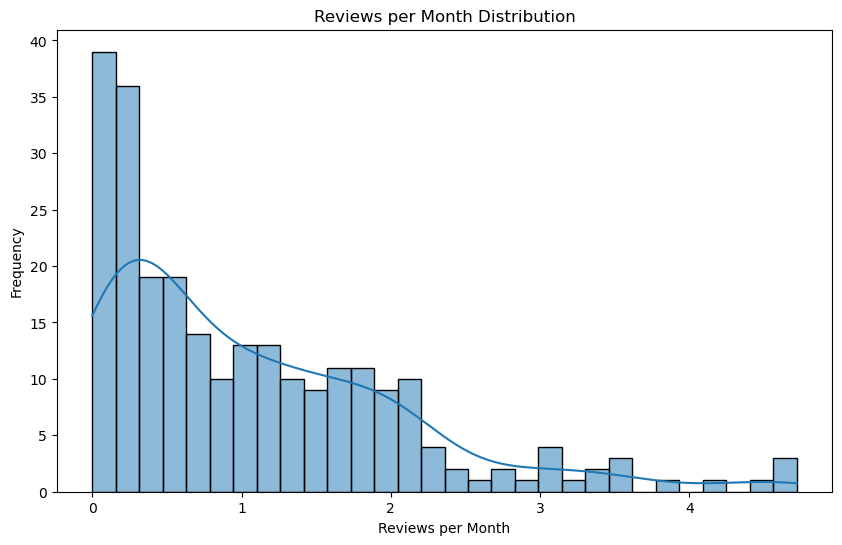

In [14]:
# 5. Reviews per Month (Histogram - seaborn)
# Column: `reviews_per_month`
# Representation: Histogram (seaborn)
# Purpose: To visualize how frequently listings are reviewed on a monthly basis.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_airbnb, x='reviews_per_month', bins=30, kde=True)
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.show()


# 6. **Availability by Room Type (Box Plot - seaborn)**:
   - **Column**: `availability_365`, `room_type`
   - **Representation**: Box plot (seaborn)
   - **Purpose**: To show the availability distribution across different room types.

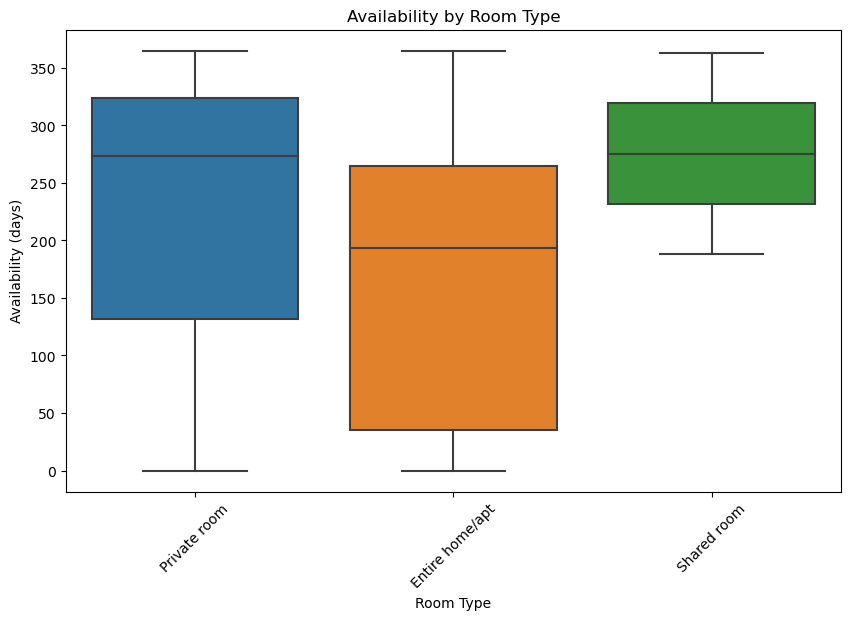

In [15]:
# 6. Availability by Room Type (Box Plot - seaborn)
# Column: `availability_365`, `room_type`
# Representation: Box plot (seaborn)
# Purpose: To show the availability distribution across different room types.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='room_type', y='availability_365')
plt.title('Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (days)')
plt.xticks(rotation=45)
plt.show()


# 7. **Reviews Distribution by Room Type (Box Plot - seaborn)**:
   - **Column**: `reviews_per_month`, `room_type`
   - **Representation**: Box plot (seaborn)
   - **Purpose**: To show the reviews distribution across different room types.

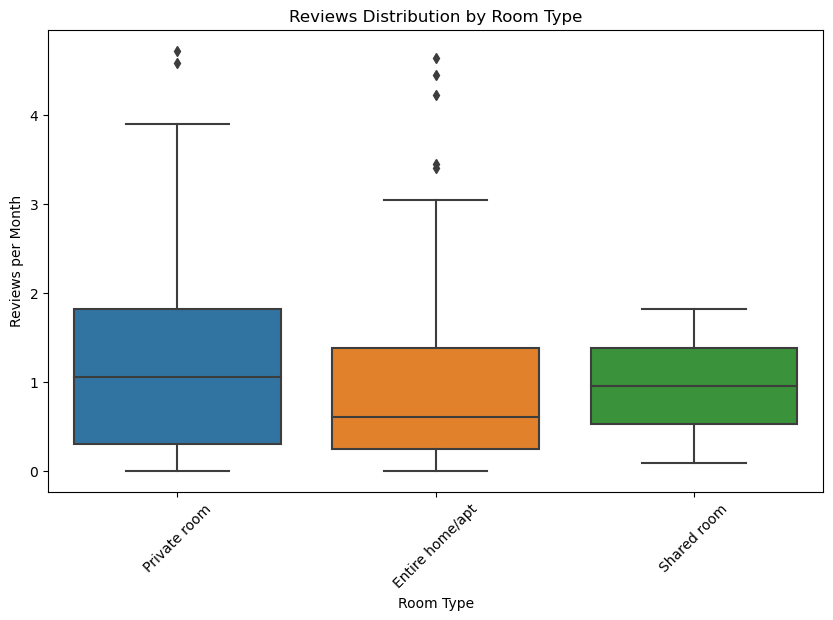

In [16]:
# 7. Reviews Distribution by Room Type (Box Plot - seaborn)
# Column: `reviews_per_month`, `room_type`
# Representation: Box plot (seaborn)
# Purpose: To show the reviews distribution across different room types.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='room_type', y='reviews_per_month')
plt.title('Reviews Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Reviews per Month')
plt.xticks(rotation=45)
plt.show()


# 8. **Price vs. Availability (Scatter Plot - seaborn)**:
   - **Column**: `price`, `availability_365`, `room_type`
   - **Representation**: Scatter plot (seaborn)
   - **Purpose**: To visualize the relationship between price and availability.

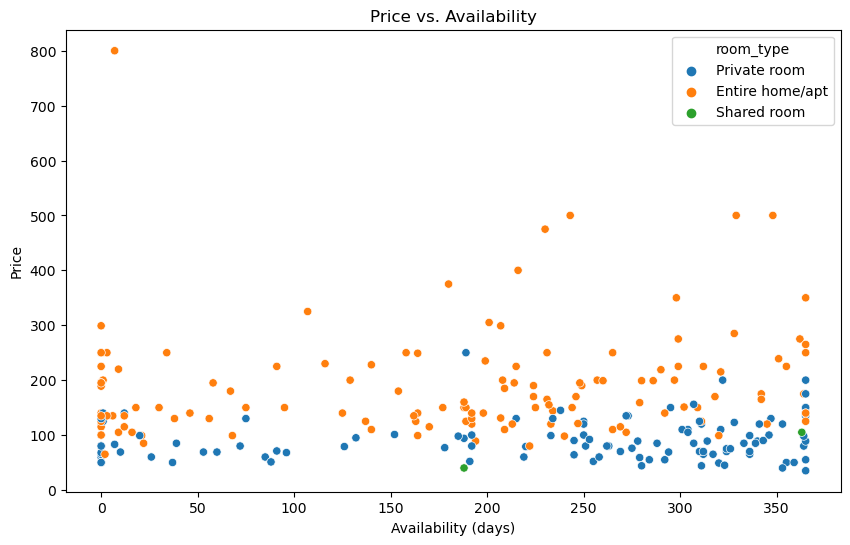

In [17]:
# 8. Price vs. Availability (Scatter Plot - seaborn)
# Column: `price`, `availability_365`, `room_type`
# Representation: Scatter plot (seaborn)
# Purpose: To visualize the relationship between price and availability.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='availability_365', y='price', hue='room_type')
plt.title('Price vs. Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()


# 9. **Room Types Distribution by Neighbourhood (Stacked Bar Plot - seaborn)**:
   - **Column**: `neighbourhood`, `room_type`
   - **Representation**: Stacked bar plot (seaborn)
   - **Purpose**: To show the distribution of different room types by neighbourhood.

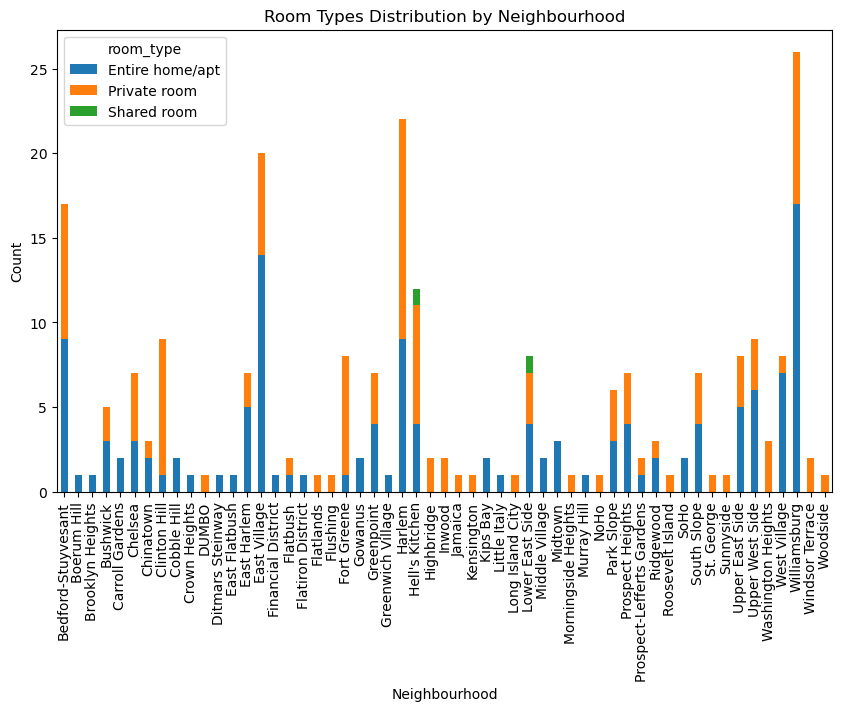

In [18]:
# 9. Room Types Distribution by Neighbourhood (Stacked Bar Plot - seaborn)
# Column: `neighbourhood`, `room_type`
# Representation: Stacked bar plot (seaborn)
# Purpose: To show the distribution of different room types by neighbourhood.
room_type_neighbourhood = df_airbnb.groupby(['neighbourhood', 'room_type']).size().unstack().fillna(0)
room_type_neighbourhood.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Types Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# 10. **Room Types Distribution by Price (Box Plot - seaborn)**:
   - **Column**: `room_type`, `price`
   - **Representation**: Box plot (seaborn)
   - **Purpose**: To show the distribution of prices for different room types.

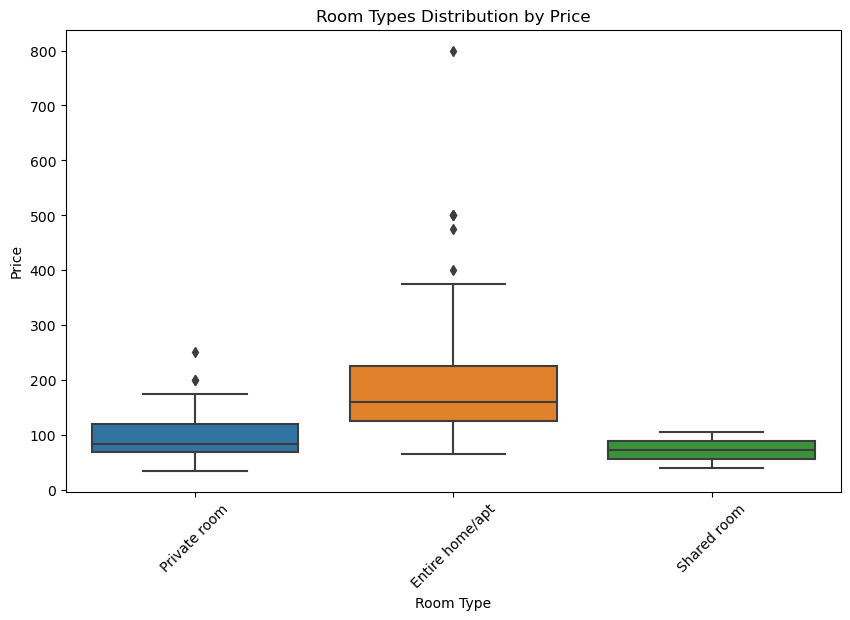

In [19]:
# 10. Room Types Distribution by Price (Box Plot - seaborn)
# Column: `room_type`, `price`
# Representation: Box plot (seaborn)
# Purpose: To show the distribution of prices for different room types.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='room_type', y='price')
plt.title('Room Types Distribution by Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Submitted by Jestover Mark David (1206)